## Communicate Data Findings


### Intodaction

#### This project is divided into two major parts :

#### In the first part, we will conduct an exploratory data analysis on a dataset of prosperLoanData. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

#### In the second part, We will take our main findings from our exploration and convey them to others through an explanatory analysis. To this end, We will create a slide deck that leverages polished, explanatory visualizations to communicate your results.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import matplotlib.ticker as ticker
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
print(loan.shape)

(113937, 81)


In [4]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
loan.duplicated().sum()

0

In [8]:
loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
missing_values= loan.isnull()
#missing_values.head()
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print(" ")

ListingKey
False    113937
Name: ListingKey, dtype: int64
 
ListingNumber
False    113937
Name: ListingNumber, dtype: int64
 
ListingCreationDate
False    113937
Name: ListingCreationDate, dtype: int64
 
CreditGrade
True     84984
False    28953
Name: CreditGrade, dtype: int64
 
Term
False    113937
Name: Term, dtype: int64
 
LoanStatus
False    113937
Name: LoanStatus, dtype: int64
 
ClosedDate
True     58848
False    55089
Name: ClosedDate, dtype: int64
 
BorrowerAPR
False    113912
True         25
Name: BorrowerAPR, dtype: int64
 
BorrowerRate
False    113937
Name: BorrowerRate, dtype: int64
 
LenderYield
False    113937
Name: LenderYield, dtype: int64
 
EstimatedEffectiveYield
False    84853
True     29084
Name: EstimatedEffectiveYield, dtype: int64
 
EstimatedLoss
False    84853
True     29084
Name: EstimatedLoss, dtype: int64
 
EstimatedReturn
False    84853
True     29084
Name: EstimatedReturn, dtype: int64
 
ProsperRating (numeric)
False    84853
True     29084
Name: ProsperRat

In [10]:
# Getting the number of missing values in each column
missing_values = loan.isna().sum()

# Excluding columns that contains 0 missing values
missing_values = missing_values[missing_values >= 1]

# Getting the percentages of missing values and round down the result 
percent_missing = missing_values * 100 / loan.shape[0]
percent_missing = percent_missing.round(2) 

# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it 
pd.concat([missing_values, percent_missing], axis=1, 
          keys=['missing_values', 'Percentage']).\
          sort_values(by="missing_values", ascending=False)

,missing_values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


In [11]:
# to extract year (2013) from loan data set must be first
#define year,quarter column as int
sr =pd.to_datetime(loan['LoanOriginationDate'])
loan['year'] = pd.PeriodIndex(sr, freq='Y').sort_values()
loan['quarter'] = pd.PeriodIndex(sr, freq='Q').sort_values()

In [12]:
#cast year from objec to int
loan['year']= loan['year'].astype(str).astype(int)

In [13]:
loan.groupby('year').count()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,quarter
year,,,,,,,,,,,,,,,,,,,,,
2005,22,22,22,5,22,22,6,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2006,5906,5906,5906,1479,5906,5906,2835,5905,5906,5906,...,5906,5906,5906,5906,5906,5906,5906,5906,5906,5906
2007,11460,11460,11460,2938,11460,11460,5553,11459,11460,11460,...,11460,11460,11460,11460,11460,11460,11460,11460,11460,11460
2008,11552,11552,11552,2967,11552,11552,5596,11550,11552,11552,...,11552,11552,11552,11552,11552,11552,11552,11552,11552,11552
2009,2047,2047,2047,507,2047,2047,984,2046,2047,2047,...,2047,2047,2047,2047,2047,2047,2047,2047,2047,2047
2010,5652,5652,5652,1411,5652,5652,2745,5652,5652,5652,...,5652,5652,5652,5652,5652,5652,5652,5652,5652,5652
2011,11228,11228,11228,2864,11228,11228,5464,11226,11228,11228,...,11228,11228,11228,11228,11228,11228,11228,11228,11228,11228
2012,19553,19553,19553,4998,19553,19553,9547,19552,19553,19553,...,19553,19553,19553,19553,19553,19553,19553,19553,19553,19553
2013,34345,34345,34345,8652,34345,34345,16405,34335,34345,34345,...,34345,34345,34345,34345,34345,34345,34345,34345,34345,34345


#### It seems that there are a lot of nulls for most of the variables in the dataset since I'm only interested to investigate some of the features from this dataset, I will subset the dataframe to extract the features of interest for my analysis and remove the nulls for this subset dataframe only

In [14]:
#second step for extract Prosper loan of year 2013
loans=loan.loc[loan['year'] ==2013]
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34345 entries, 67420 to 101764
Data columns (total 83 columns):
ListingKey                             34345 non-null object
ListingNumber                          34345 non-null int64
ListingCreationDate                    34345 non-null object
CreditGrade                            8652 non-null object
Term                                   34345 non-null int64
LoanStatus                             34345 non-null object
ClosedDate                             16405 non-null object
BorrowerAPR                            34335 non-null float64
BorrowerRate                           34345 non-null float64
LenderYield                            34345 non-null float64
EstimatedEffectiveYield                25650 non-null float64
EstimatedLoss                          25650 non-null float64
EstimatedReturn                        25650 non-null float64
ProsperRating (numeric)                25650 non-null float64
ProsperRating (Alpha)       

In [15]:
#Define features of interest for this analysis
features =   ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)',
              'EmploymentStatus', 'StatedMonthlyIncome', 'TotalProsperLoans',
              'LoanOriginalAmount', 'Recommendations', 'Investors','BorrowerAPR','ProsperScore',
            'Occupation','IncomeRange','LoanOriginationDate','year','quarter' ]

In [16]:
#Look at the dataset
loans[features].sample(6)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors,BorrowerAPR,ProsperScore,Occupation,IncomeRange,LoanOriginationDate,year,quarter
79937,60,Current,0.1385,A,1,Employed,4166.666667,1.0,8500,0,153,0.16151,9.0,Nurse (LPN),"$50,000-74,999",2012-05-11 00:00:00,2013,2013Q3
87187,36,Chargedoff,0.2099,C,1,Employed,5666.666667,NaN,15000,0,28,0.24758,7.0,Computer Programmer,"$50,000-74,999",2012-07-09 00:00:00,2013,2013Q3
91168,36,Completed,0.1500,NaN,0,NaN,4583.333333,NaN,5000,0,35,0.15713,NaN,NaN,Not displayed,2006-05-31 00:00:00,2013,2013Q4
88825,36,Completed,0.2958,E,1,Employed,10416.666667,NaN,3000,0,38,0.33553,6.0,Professional,"$100,000+",2012-07-06 00:00:00,2013,2013Q4
94544,36,Chargedoff,0.2675,NaN,1,Full-time,2916.666667,NaN,3500,0,63,0.29081,NaN,Bus Driver,"$25,000-49,999",2008-06-03 00:00:00,2013,2013Q4
94247,36,Defaulted,0.2010,NaN,6,Full-time,4333.333333,NaN,3000,0,91,0.22338,NaN,Nurse (RN),"$50,000-74,999",2009-09-02 00:00:00,2013,2013Q4


In [17]:
loans[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34345 entries, 67420 to 101764
Data columns (total 18 columns):
Term                         34345 non-null int64
LoanStatus                   34345 non-null object
BorrowerRate                 34345 non-null float64
ProsperRating (Alpha)        25650 non-null object
ListingCategory (numeric)    34345 non-null int64
EmploymentStatus             33669 non-null object
StatedMonthlyIncome          34345 non-null float64
TotalProsperLoans            6676 non-null float64
LoanOriginalAmount           34345 non-null int64
Recommendations              34345 non-null int64
Investors                    34345 non-null int64
BorrowerAPR                  34335 non-null float64
ProsperScore                 25650 non-null float64
Occupation                   33256 non-null object
IncomeRange                  34345 non-null object
LoanOriginationDate          34345 non-null object
year                         34345 non-null int32
quarter              

In [18]:
# Check unique LoanStatus
loans['LoanStatus'].unique()

array(['Current', 'FinalPaymentInProgress', 'Completed', 'Chargedoff',
       'Defaulted', 'Past Due (1-15 days)', 'Past Due (61-90 days)',
       'Past Due (91-120 days)', 'Past Due (31-60 days)',
       'Past Due (16-30 days)', 'Cancelled', 'Past Due (>120 days)'],
      dtype=object)

In [19]:
# Check unique Employment Status
loans['EmploymentStatus'].unique()

array(['Employed', 'Full-time', 'Part-time', 'Retired', 'Not available',
       'Other', nan, 'Self-employed', 'Not employed'], dtype=object)

In [20]:
# Check unique Employment Status
loans['IncomeRange'].unique()

array(['$50,000-74,999', '$1-24,999', '$100,000+', '$25,000-49,999',
       '$75,000-99,999', 'Not displayed', 'Not employed', '$0'],
      dtype=object)

In [21]:
# Check unique ProsperRating (Alpha) Status
loans['ProsperRating (Alpha)'].unique()

array(['C', 'A', nan, 'AA', 'D', 'B', 'E', 'HR'], dtype=object)

##### Since the variables EmploymentStatus, ProsperScore, Term ,LoanStatus are basically categorical variabels, I will change their datatype till categorical


In [91]:
loans['ProsperScore'] = loans['ProsperScore'].astype('category')
loans['Term'] = loans['Term'].astype('category')
loans['IncomeRange'] = loans['IncomeRange'].astype('category')
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype('category')
loans['LoanStatus'] = loans['LoanStatus'].astype('category')
print(loans[features].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33921 entries, 67420 to 101764
Data columns (total 18 columns):
Term                         33921 non-null category
LoanStatus                   33921 non-null category
BorrowerRate                 33921 non-null float64
ProsperRating (Alpha)        25226 non-null category
ListingCategory (numeric)    33921 non-null int64
EmploymentStatus             33245 non-null category
StatedMonthlyIncome          33921 non-null float64
TotalProsperLoans            6441 non-null float64
LoanOriginalAmount           33921 non-null int64
Recommendations              33921 non-null int64
Investors                    33921 non-null int64
BorrowerAPR                  33911 non-null float64
ProsperScore                 25226 non-null category
Occupation                   32837 non-null object
IncomeRange                  33921 non-null category
LoanOriginationDate          33921 non-null object
year                         33921 non-null int32
quarter  

## What is the structure of your dataset?
#### There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and details regarding the loans.This analysis will focus on year (2013) and factors that are related to Prosper loans status (LoanStatus).

## why we choose series in  '2013' for analysis Prosper Data?
#### becuse the total of loans entries was higher through dataset was in '2013' is 34345 applicants .

#### The independent variables of interest are:
1- Term                       
2- LoanStatus                 
3- BorrowerRate               
4- ProsperRating (Alpha)      
5- ListingCategory (numeric)    
6- EmploymentStatus            
7- StatedMonthlyIncome        
8- TotalProsperLoans          
9- LoanOriginalAmount           
10- LoanOriginationDate         
11- Recommendations              
12- Investors                   
13- BorrowerAPR                
14- ProsperScore              
15- Occupation                  
16- IncomeRange
17- year
18- quarter

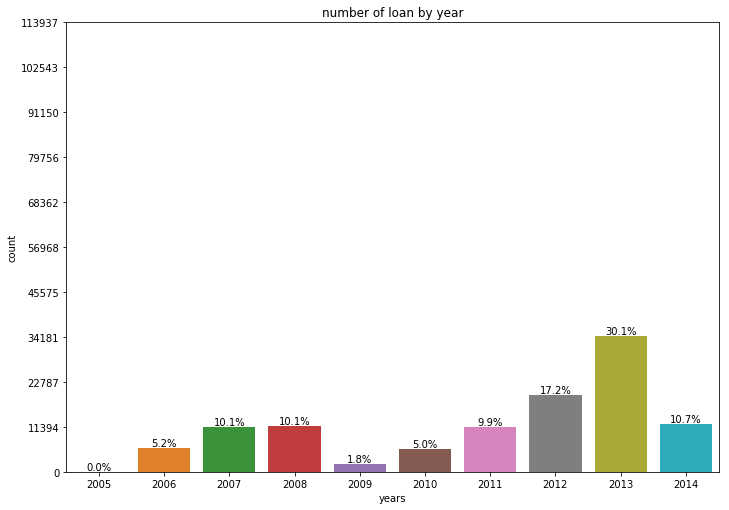

In [90]:
#First let's take a look at number of loans variable by years using a Count Plot:
plt.figure(figsize=[ 11.69, 8.27])
ncount = len(loan)
ax=sb.countplot(data=loan, x='year')
plt.title('number of loan by year')
plt.xlabel('years')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)
plt.show()

## What is/are the main feature(s) of interest in your dataset?
#### This analysis will focus on figuring out what features are best for predicting Prosper's loan statuses.



## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
#### The present analysis will investigate a group of borrowers features along with the type of the listing/loan will be analyzed to correctly understand which factors likely impact Prosper's final loan status.

#### The features listed in the previous section will be subject of this analysis. However, we do understand that it isn't exhaustive and additional features may be required, as well as a deeper business understanding and history of decisions made by Prosper top management.

## Univariate Exploration

#### In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.



In [23]:
# setting plt size and color
plt.figure(figsize=[ 11.69, 8.27])
default_color = sb.color_palette()[9]
ncount = len(loans)

<Figure size 841.68x595.44 with 0 Axes>

(0, 34345)

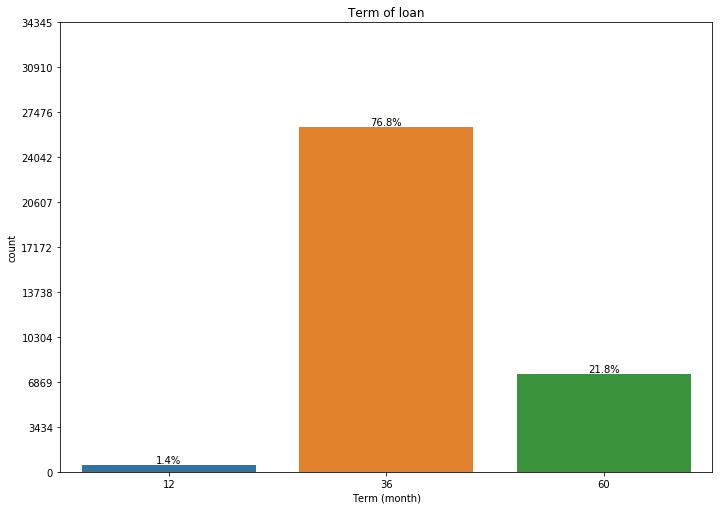

In [24]:
#First let's take a look at Term variable using a Count Plot:
#Visulizing the time period '2013' for loan
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans, x='Term')
plt.title('Term of loan')
plt.xlabel('Term (month)')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### For Term: the loans time periods, there are three options: 36, 60 and 12 months. the most common trem for the loans in the dataset is 36 months. Next, let's check LoanStatus:

(0, 34345)

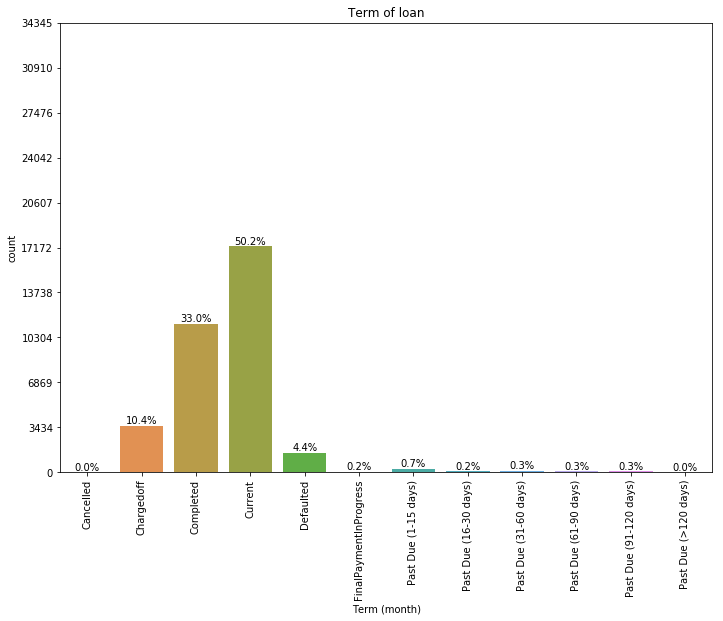

In [25]:
plt.figure(figsize=[ 11.69, 8.27])
plt.xticks(rotation=90)
ax=sb.countplot(data=loans, x='LoanStatus')
plt.title('Term of loan')
plt.xlabel('Term (month)')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### Most of the loans in the dataset are actually Current loans. Following it with a big frequency the Completed loans, followed by Chargedoff, while Defaulted and Past due categories loans represent a minority. Up next - BorrowerRate:

Text(0,0.5,'Count')

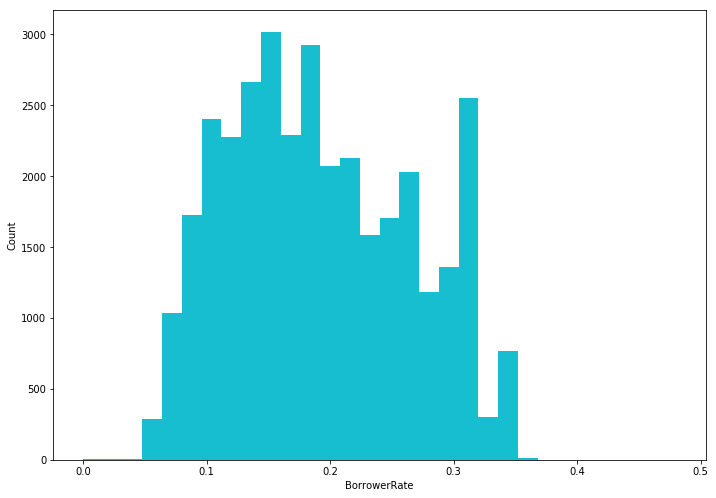

In [26]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans, x='BorrowerRate', bins=30, color = default_color);
plt.xlabel('BorrowerRate')
plt.ylabel('Count')

#### The distribution of the BorrowerRate appears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurrences:

In [95]:
# Check the frequency of the top 5 peaks round tow number
loan[features].BorrowerRate.round(2).value_counts().nlargest(5)

0.14    6476
0.18    6371
0.16    5990
0.32    5925
0.15    5632
Name: BorrowerRate, dtype: int64

In [27]:
# Check the frequency of the top 2 peaks
loan[features].BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3500    1905
Name: BorrowerRate, dtype: int64

#### Turns out two most common rates are 0.3177 and 0.3500. Let's check ProsperRating (Alpha) next:

#### Because ProsperRating (Alpha) is ordinal categorial variable (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [28]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_list)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

(0, 34345)

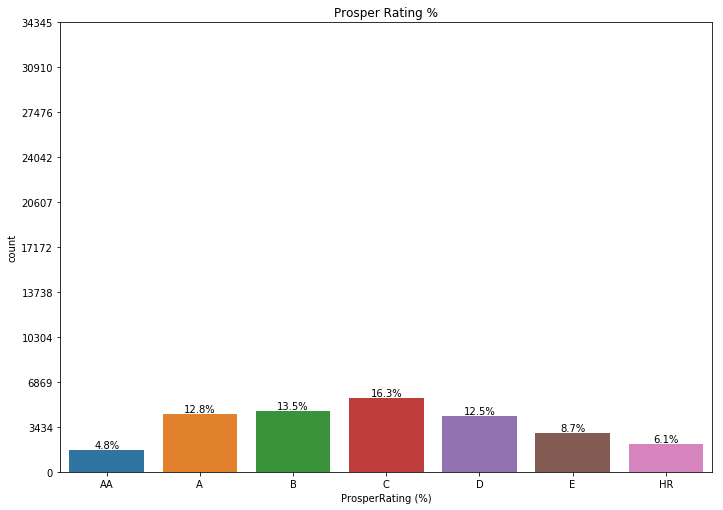

In [29]:
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans, x='ProsperRating (Alpha)')
plt.title('Prosper Rating %')
plt.xlabel('ProsperRating (%)')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### Interestingly enough ratings are almost normally distributed with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan through ListingCategory (numeric):

(0, 34345)

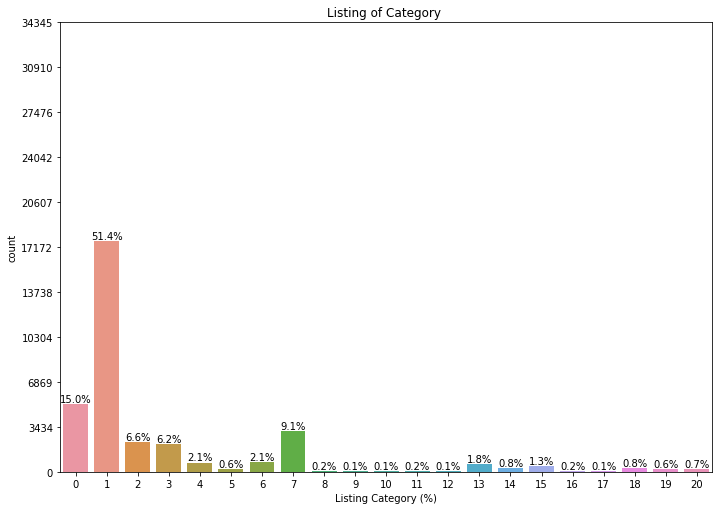

In [30]:
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans, x='ListingCategory (numeric)')
plt.title('Listing of Category ')
plt.xlabel('Listing Category (%)')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### The category of the listing that the borrower selected when posting their listing: 
0 - Not Available, 
1 - Debt Consolidation, 
2 - Home Improvement, 
3 - Business, 
4 - Personal Loan, 
5 - Student Use, 
6 - Auto, 
7- Other, 
8 - Baby&Adoption, 
9 - Boat, 
10 - Cosmetic Procedure, 
11 - Engagement Ring, 
12 - Green Loans, 
13 - Household Expenses, 
14 - Large Purchases, 
15 - Medical/Dental, 
16 - Motorcycle, 
17 - RV, 
18 - Taxes, 
19 - Vacation, 
20 - Wedding Loans

#### The vast majority of loans are used for debt consolidation. Other notable categories include Other, Home Improvement and Business. Next variable - EmploymentStatus:

(0, 34345)

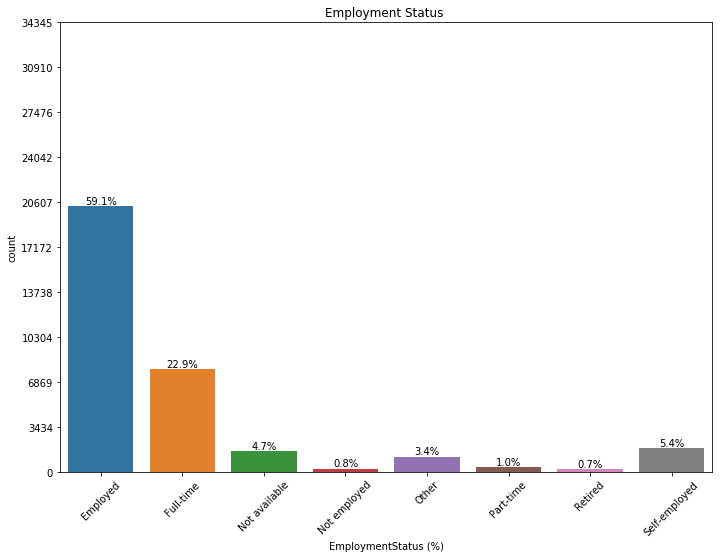

In [31]:
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=loans, x='EmploymentStatus')
plt.title('Employment Status ')
plt.xlabel('EmploymentStatus (%)')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=45);
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### The majority of borrowers are Employed (59%) and Full-time (22.9%) all other categories constitute only small numbers of the borrowers. Let's move to the DelinquenciesLast7Years variable:

Text(0,0.5,'Count')

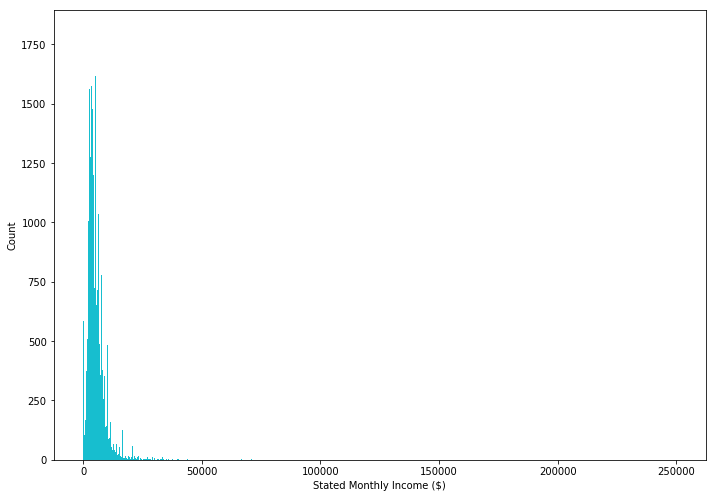

In [32]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans, x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Count')

#### Distribution of stated monthly income is highly skewed to the right. Let's check the outliers of the loan data:

In [33]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loans['StatedMonthlyIncome'].std()
income_mean = loans['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loans['StatedMonthlyIncome'] >= boundary)

34345

Text(0,0.5,'Count')

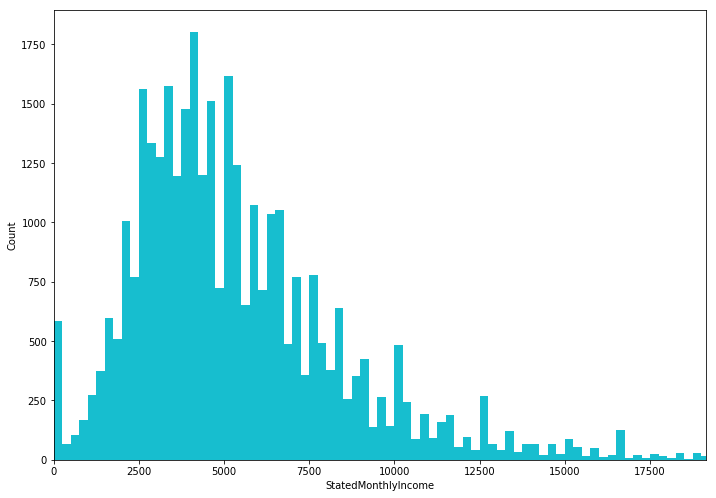

In [34]:
#Let's take a close look at the StatedMonthlyIncome;
# This time limit x scale by boundary
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans, x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlim(0, boundary);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')

#### With a boundary of mean + three standard deviations, the distribution of the monthly income still has noticeable right skew but now we can see that mode is between 2500 and 7,500. Next step – TotalProsperLoans:

(0, 113937)

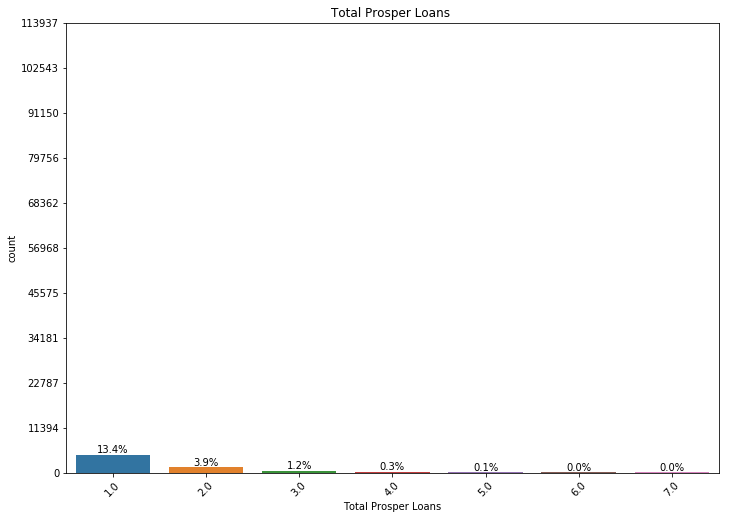

In [98]:
plt.figure(figsize=[ 11.69, 8.27])
ncount_=len(loans['TotalProsperLoans'])
ax=sb.countplot(data=loans, x='TotalProsperLoans')
plt.title('Total Prosper Loans ')
plt.xlabel('Total Prosper Loans')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount_), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=45);
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

#### For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 7 loans. Next step - LoanOriginalAmount:

Text(0,0.5,'Count')

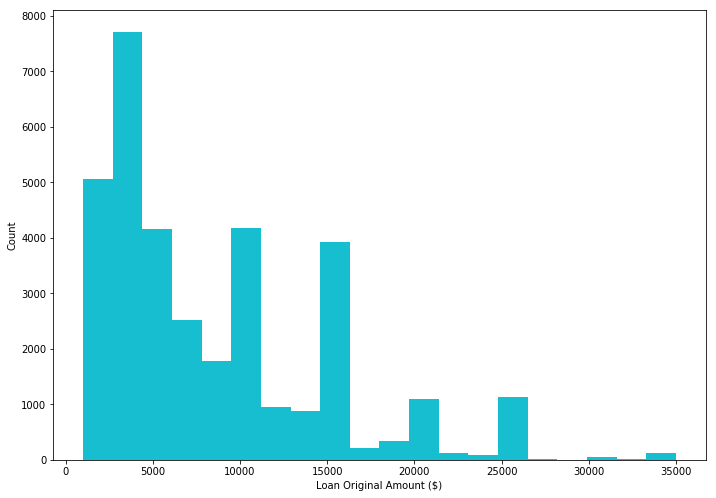

In [36]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans, x='LoanOriginalAmount', bins=20, color=default_color)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')

#### It looks like most of the loans are below 15,000 range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc.
#### Let's move on to LoanOriginationDate:

Text(0.5,0,'number of Loans by quarter')

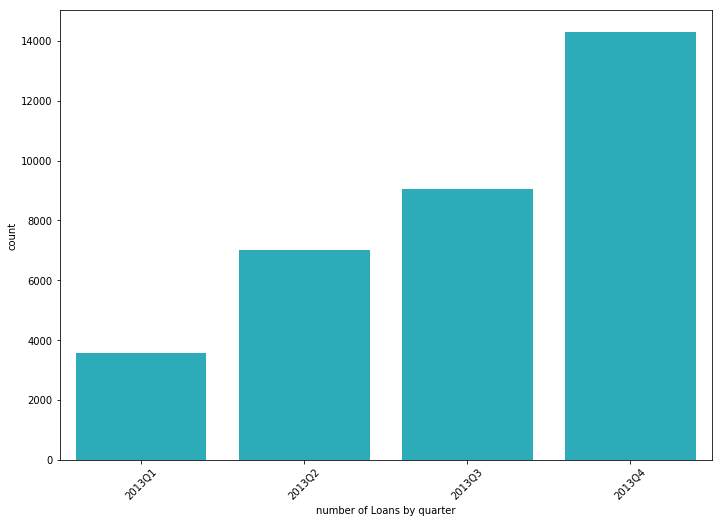

In [99]:
plt.figure(figsize=[ 11.69, 8.27])

plt.xticks(rotation=45)
sb.countplot(data=loans, x='quarter', color=default_color );
plt.xlabel('number of Loans by quarter')

#### We can clearly see the high number of loans was in the fourth quarter
#### Next item - Recommendations:

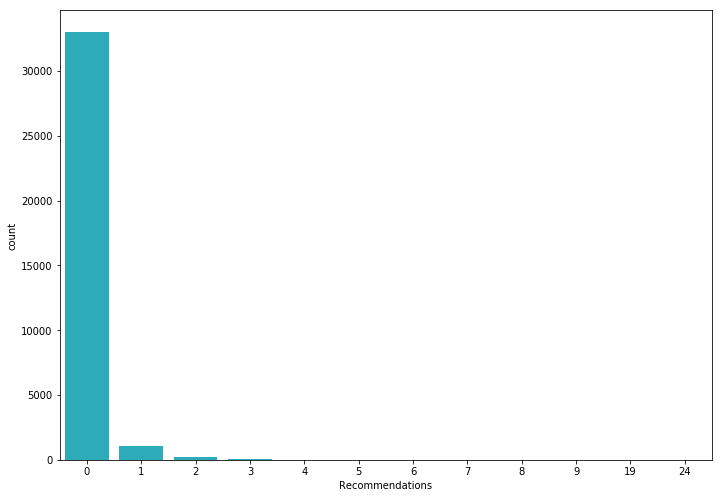

In [38]:
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data=loans, x='Recommendations', color=default_color)

#### The vast majority of loans obtained without recomendations. Next let's dig into Investors:

Text(0,0.5,'Count')

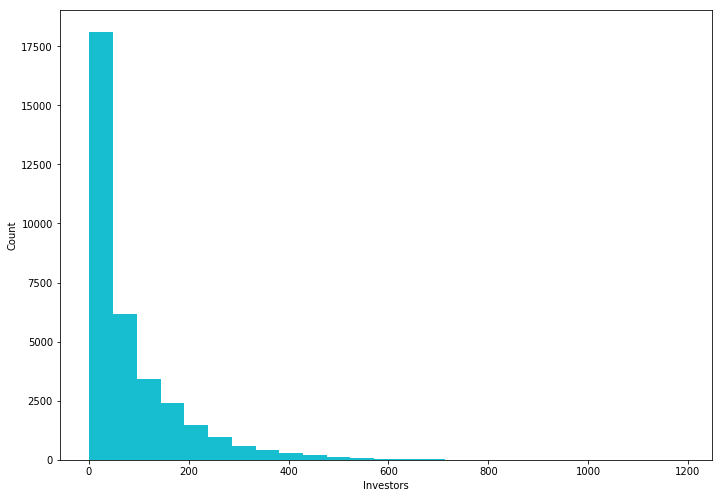

In [39]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans, x='Investors', bins=25, color=default_color)
plt.xlabel('Investors')
plt.ylabel('Count')

In [40]:
loans['year'].groupby(loans['Investors']).agg(['count'])

,count
Investors,
1,8506
2,432
3,293
4,234
5,231
6,210
7,207
8,223
9,218


#### Most loans have only one investor and majority less than 200 investors .

Text(0,0.5,'Count of Loans')

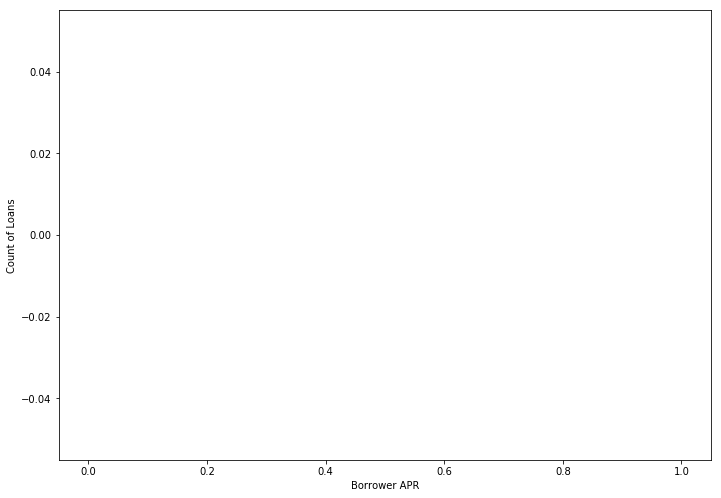

In [103]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data=loans.dropna(), x='BorrowerAPR', bins=1000, color=default_color);
plt.xlabel('Borrower APR')
plt.ylabel('Count of Loans')

In [104]:
loans['BorrowerAPR'].groupby(loans['BorrowerAPR'].apply(lambda x: round(x, 1)),sort=False).agg(['count'])

,count
BorrowerAPR,
0.2,14747
0.1,7348
0.4,3129
0.3,8674
0.0,12
0.5,1


In [43]:
loans['BorrowerAPR'].groupby(loans['BorrowerAPR'].apply(lambda x: round(x, 2)),sort=False).agg(['count'])

,count
BorrowerAPR,
0.21,1559
0.12,1046
0.20,1777
0.37,505
0.09,869
0.29,1170
0.19,1369
0.33,553
0.18,1785


#### The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [44]:
# getting a first overview over the variable ProsperScore
print(loans.ProsperScore.describe())
print(loans.ProsperScore.value_counts())

count     25650.0
unique       11.0
top           4.0
freq       3873.0
Name: ProsperScore, dtype: float64
4.0     3873
6.0     3714
8.0     3615
7.0     3202
5.0     2913
3.0     2314
9.0     2104
2.0     1768
10.0    1411
11.0     424
1.0      312
Name: ProsperScore, dtype: int64


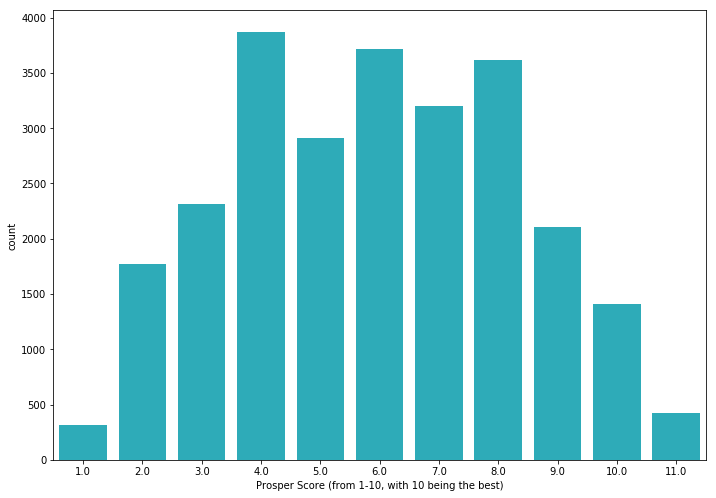

In [45]:
 #Bar Chart ProsperScore (custom risk score built using historical Prosper data)
# The score ranges from 1-10, with 10 being the best, or lowest risk score)
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loans, x = 'ProsperScore', color = default_color)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

#### The bar chart shows that there are customers in the data set that have a score of 11 which should not be possible since the score just ranges from 1-10 which needs to be cleaned in the next step

In [46]:
# I will exclude all customers with a Prosper Score of 11
loans = loans[loans['ProsperScore'] != 11]
#dubbel check if the operation was succesful
loans[loans['ProsperScore'] == 11].count()

ListingKey                             0
ListingNumber                          0
ListingCreationDate                    0
CreditGrade                            0
Term                                   0
LoanStatus                             0
ClosedDate                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
GroupKey                               0
DateCreditPulled

In [47]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33921 entries, 67420 to 101764
Data columns (total 83 columns):
ListingKey                             33921 non-null object
ListingNumber                          33921 non-null int64
ListingCreationDate                    33921 non-null object
CreditGrade                            8652 non-null object
Term                                   33921 non-null category
LoanStatus                             33921 non-null category
ClosedDate                             16394 non-null object
BorrowerAPR                            33911 non-null float64
BorrowerRate                           33921 non-null float64
LenderYield                            33921 non-null float64
EstimatedEffectiveYield                25226 non-null float64
EstimatedLoss                          25226 non-null float64
EstimatedReturn                        25226 non-null float64
ProsperRating (numeric)                25226 non-null float64
ProsperRating (Alpha)  

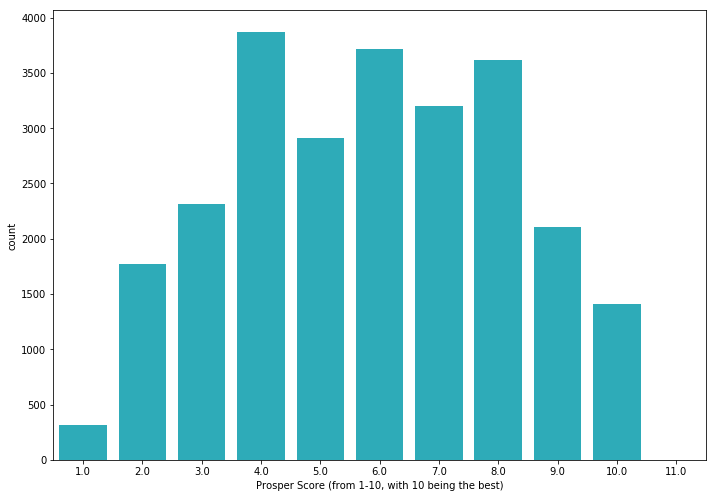

In [48]:
# now I will again plot the bar chart
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loans, x = 'ProsperScore', color = default_color)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)');

#### Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan from Prosper. Furthermore, not many borrowers received the highest score of 10

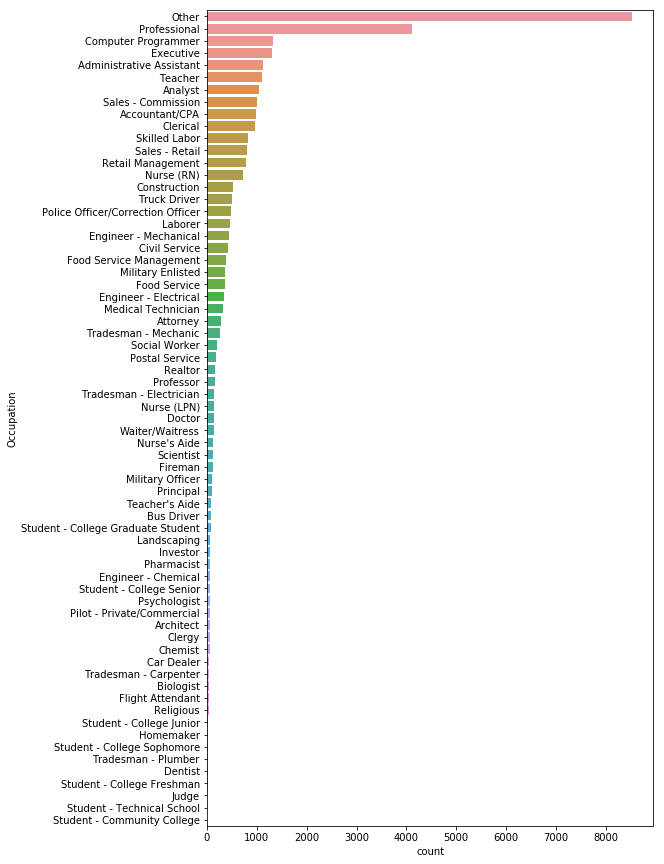

In [49]:
plt.figure(figsize=[8,15])
Occupation_order=loans["Occupation"].value_counts().index
sb.countplot(data = loans, y = 'Occupation',order=Occupation_order)
plt.ylabel('Occupation')
plt.show()

#### In gerenral, studnets has the least number of loans.The mximum amount of loan belongs to "others" occupation, which I do not have any idea what it means! After "others, professionals with 15,000 are in the second place and all other jobs has <5000 number.

(0, 33921)

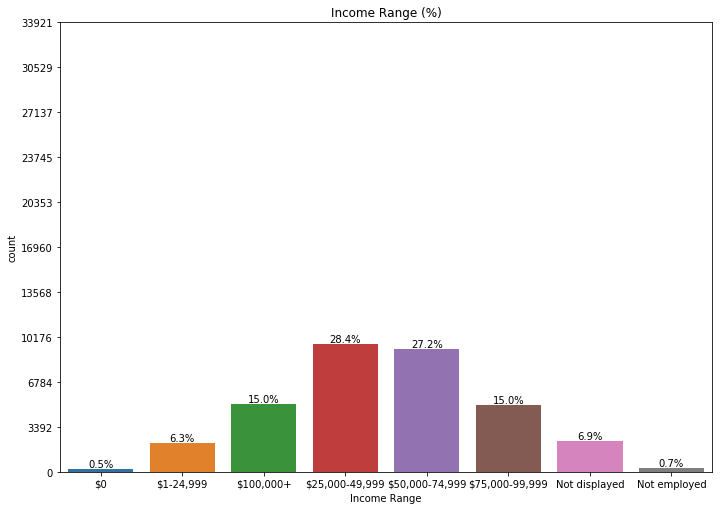

In [50]:
plt.figure(figsize=[ 11.69, 8.27])
IncomeRange_order=["Not displayed", "Not employed", "$0","$1-24,999","$25,000-49,999",
                   "$50,000-74,999","$75,000-99,999","$100,000+" ]
ncount=len(loans)
ax=sb.countplot(data=loans, x='IncomeRange')
plt.title('Income Range (%)')
plt.xlabel('Income Range')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

In [51]:
loans['IncomeRange'].groupby(loans['IncomeRange']).count()

IncomeRange
$0                 185
$1-24,999         2136
$100,000+         5080
$25,000-49,999    9632
$50,000-74,999    9235
$75,000-99,999    5072
Not displayed     2329
Not employed       252
Name: IncomeRange, dtype: int64

#### Clearly, most of (" 28.4%") loaners are have a salary of "25,000-49,999" and "50,000-74,999." After that, on the second level ("27.2%"), laoners are making "$75,000-99,999" and "$100,000+." Rest of loaner, either are not employed, or making "<$25,000"

## Bivariate Exploration


##### To start off with, we will look at the pairwise correlations present between features in the data.

In [52]:
#Numberical vs Categorical features
numeric_vars = ['BorrowerRate', 
                'StatedMonthlyIncome','Recommendations','LoanOriginalAmount',
                'ListingCategory (numeric)', 'TotalProsperLoans',
                'LoanOriginationDate','Investors','BorrowerAPR']

categoric_vars = ['Term','LoanStatus', 'ProsperScore', 'EmploymentStatus','IncomeRange','Occupation']

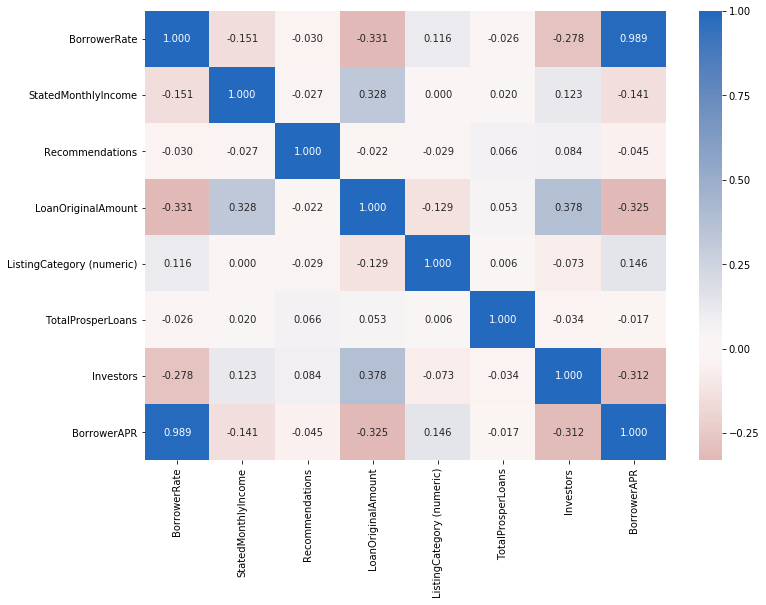

In [53]:
# correlation plot
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

#### Correlation Plot: There are no strong positive relationships between any pairs. It makes sense because higher BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. 

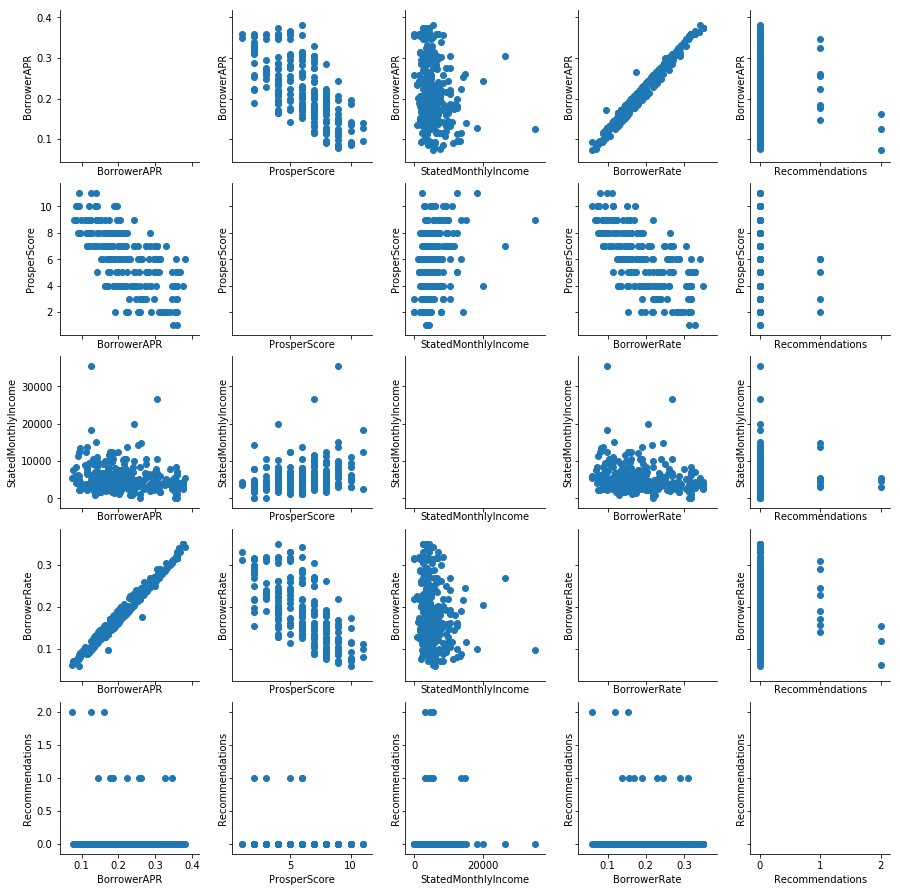

In [72]:
# plot matrix: only 300 random loans are used to see the pattern more clearer
numeric_vars = ['BorrowerAPR', 'ProsperScore', 
            'StatedMonthlyIncome','BorrowerRate','Recommendations' ]

samples = np.random.choice(loan[features].shape[0], 300, replace = False)
loan_samp = loan[features].loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
#plt.title('Matrix Plot')
xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

#### Matrix Plot: Similar to the correlation plot, we can determine which pair has negative or  positive relationships from analyzing the pattern in each scatter plots. ProsperScore seems to be more related to BorrowerAPR compare to other variables. StatedMonthlyIncome does not give useful information on BorrowerAPR and will not be further analyzed.


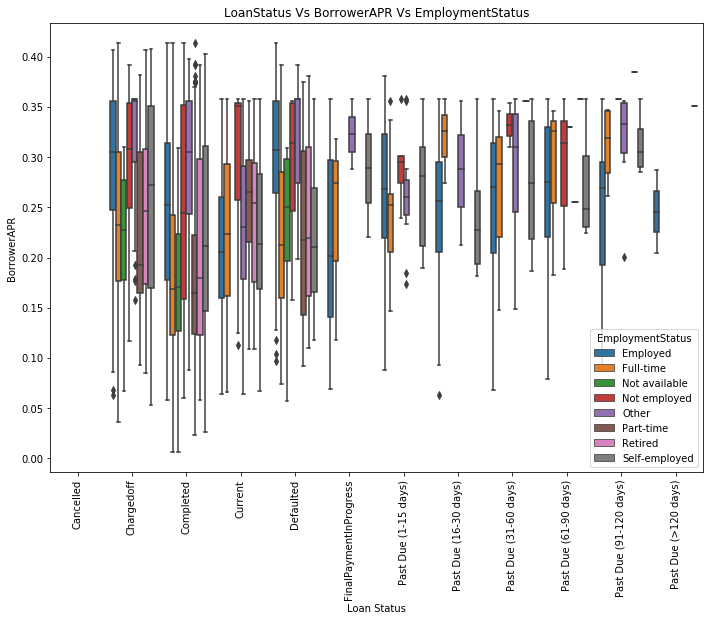

In [58]:
# LoanStatus Vs BorrowerAPR VS EmploymentStatus
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0:]
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue='EmploymentStatus', data=loans, palette=base_color);
plt.xticks(rotation = 90);
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.title('LoanStatus Vs BorrowerAPR Vs EmploymentStatus');

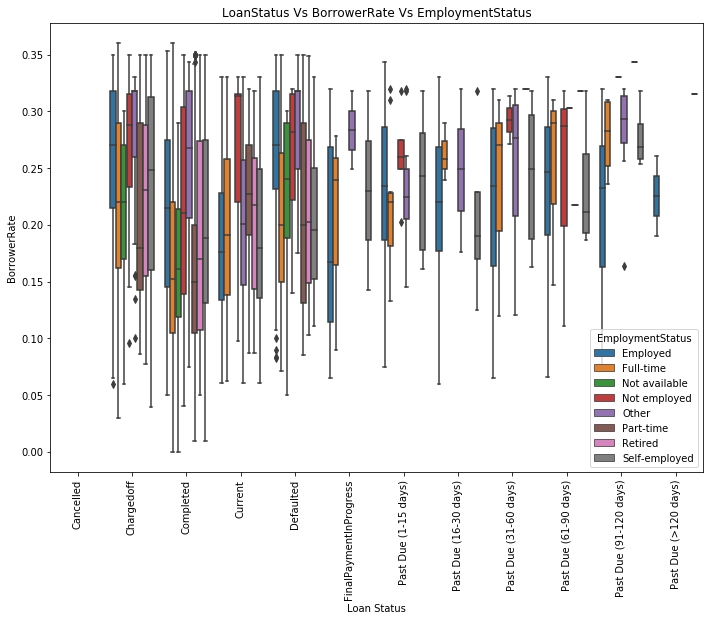

In [57]:
plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0:]
sb.boxplot(x="LoanStatus", y="BorrowerRate", hue='EmploymentStatus', data=loans, palette=base_color);
plt.xticks(rotation = 90);
plt.xlabel('Loan Status');
plt.ylabel('BorrowerRate');
plt.title('LoanStatus Vs BorrowerRate Vs EmploymentStatus');

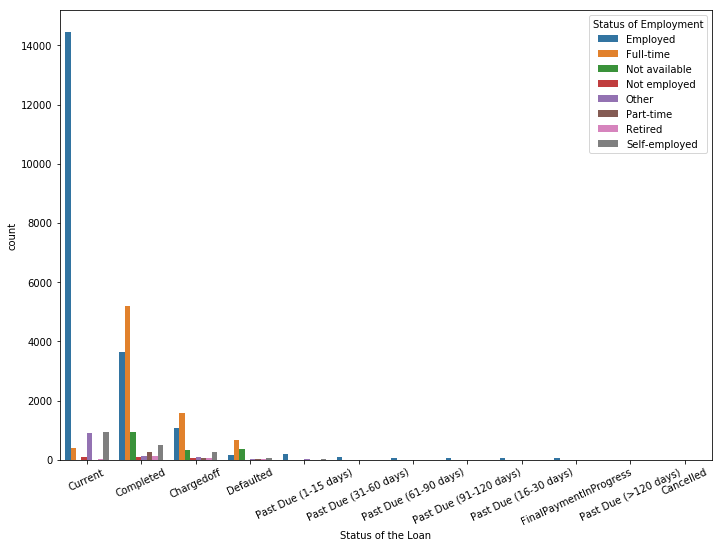

In [59]:
#plotting EmploymentStatus (Status of Employment) against LoanStatus with help of a heat map
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loans, x = 'LoanStatus', hue = 'EmploymentStatus', order = loans['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 1, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The status of the employment of the borrower seem not to have an impact on the outcome of the loan.


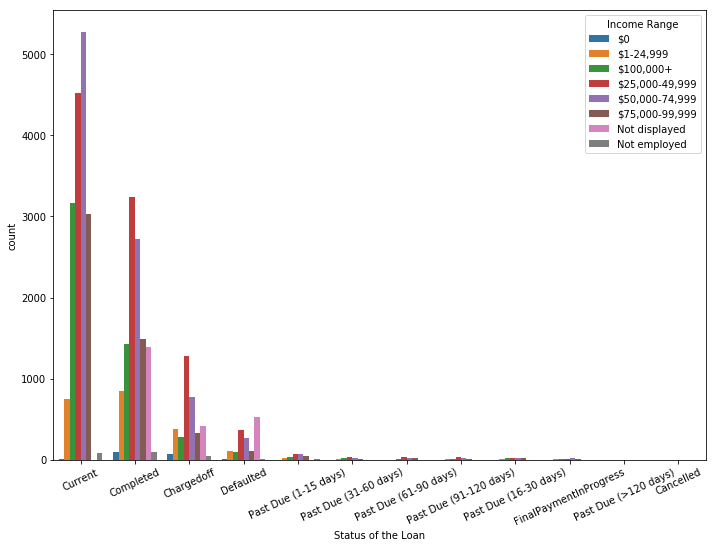

In [60]:
#plotting Income Range against LoanStatus with help of a heat map
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = loans, x = 'LoanStatus', hue = 'IncomeRange', order = loans['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 1, title = 'Income Range')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan');

#### The Income Range of the borrower seem not to have an impact on the outcome of the loan.


#### let's look at relationships between the four categorical features.

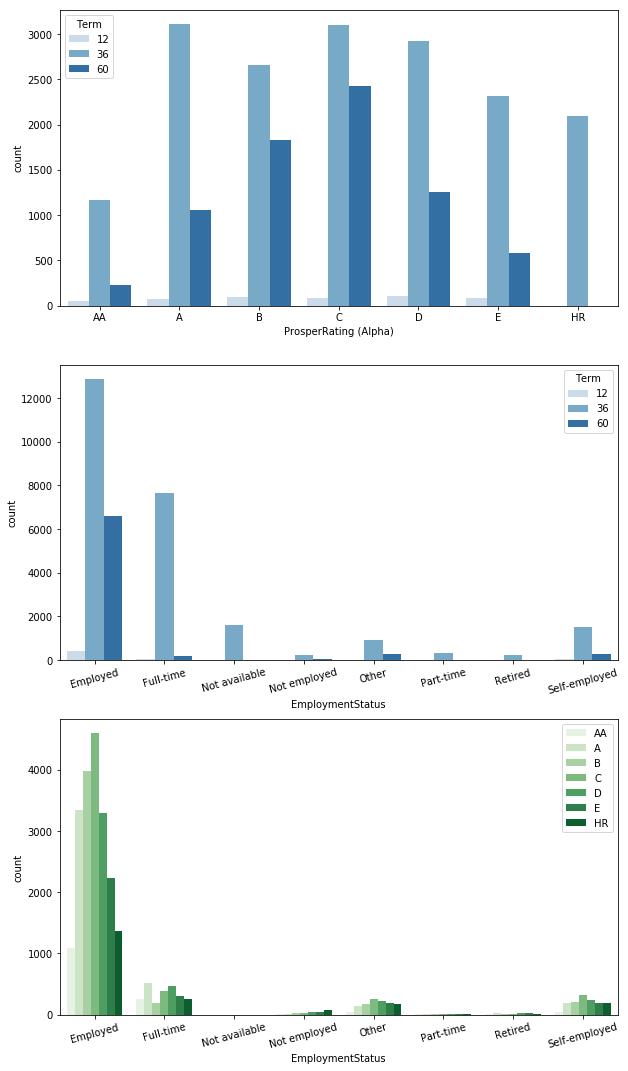

In [61]:
plt.figure(figsize = [10, 25])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)
# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 1); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

#### The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

<Figure size 841.68x595.44 with 0 Axes>

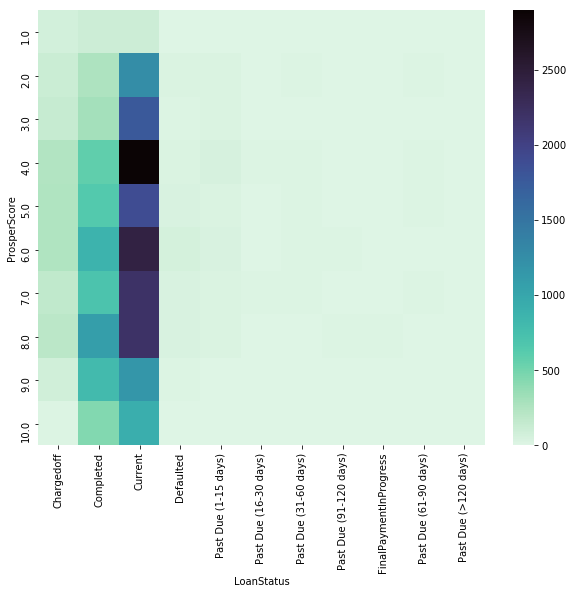

In [62]:
plt.figure(figsize=[ 11.69, 8.27])
ct_counts=loans.groupby(["ProsperScore", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="ProsperScore", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)
plt.figure(figsize = [10,8])
sb.heatmap(ct_counts,cmap="mako_r");

#### Above graph shows that 1. in this data most people currenly have a loan or completed their loans and their interest rate is ~4-8.



### Talk about some of the relationships you observed in this part of the investigation. 
How did the feature(s) of interest vary with other features in the dataset?
###### 1- Most of those who completed their loans has a ProsperScore above 3. 
###### 2- Most of those who currently has loan, has a ProsperScore of 4, and the minimum count of loaners belong to those who has a ProsperScore of 1.
###### 3- The majority (~50,000) of people who currenly has a loan are empolyed no matter what is their ProsperScore. 
###### 4- If their ProsperScore is between 4 and 8, the population of employed loan borrowers in each particular ProsperScore is between 6000 and 8000. 
###### 5- In ProsperScore of 2 to 8, the number of loaners who has a salary of 25-49k and 50-74k is more than others salary groups and if the ProsperScore is between 4 and 8, the popluation of both salries of 25-49k and 50-74k groups ranges between 2500 and 3900. 
###### 6- Plots also show that BorrowerRate has a negative relationship with LoanOriginalAmount and has a postive relationship with ProsperScore. 
###### 7- IncomeRange also affect the LoanOriginalAmount in a positive way. The plot of the full data using a violin plot suggests that borrow rate is independant of income range and ranges ~0.15-0.21

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
#### There is a positive relationshi between ProsperScore and LoanOriginalAmount. The number of people with emplyed and full time status who currently have a loan or completed their laons is much higher than other people with other employment status. In this data, most people currenly have a loan or completed their loans, and their interest rates is ~4-8.

## Multivariate Exploration

#### The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and loan original amount

<Figure size 841.68x595.44 with 0 Axes>

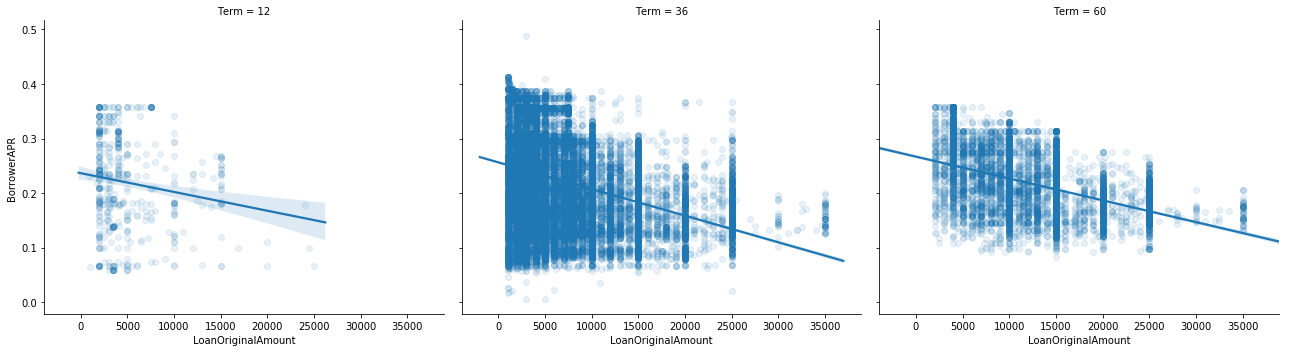

In [63]:
# Term effect on relationship of APR and loan amount
plt.figure(figsize=[ 11.69, 8.27])
g=sb.FacetGrid(data=loans, aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sb.regplot,'LoanOriginalAmount','BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

#### Term doesn't seem to have effect on relationship of Borrower APR and loan amount



<Figure size 841.68x595.44 with 0 Axes>

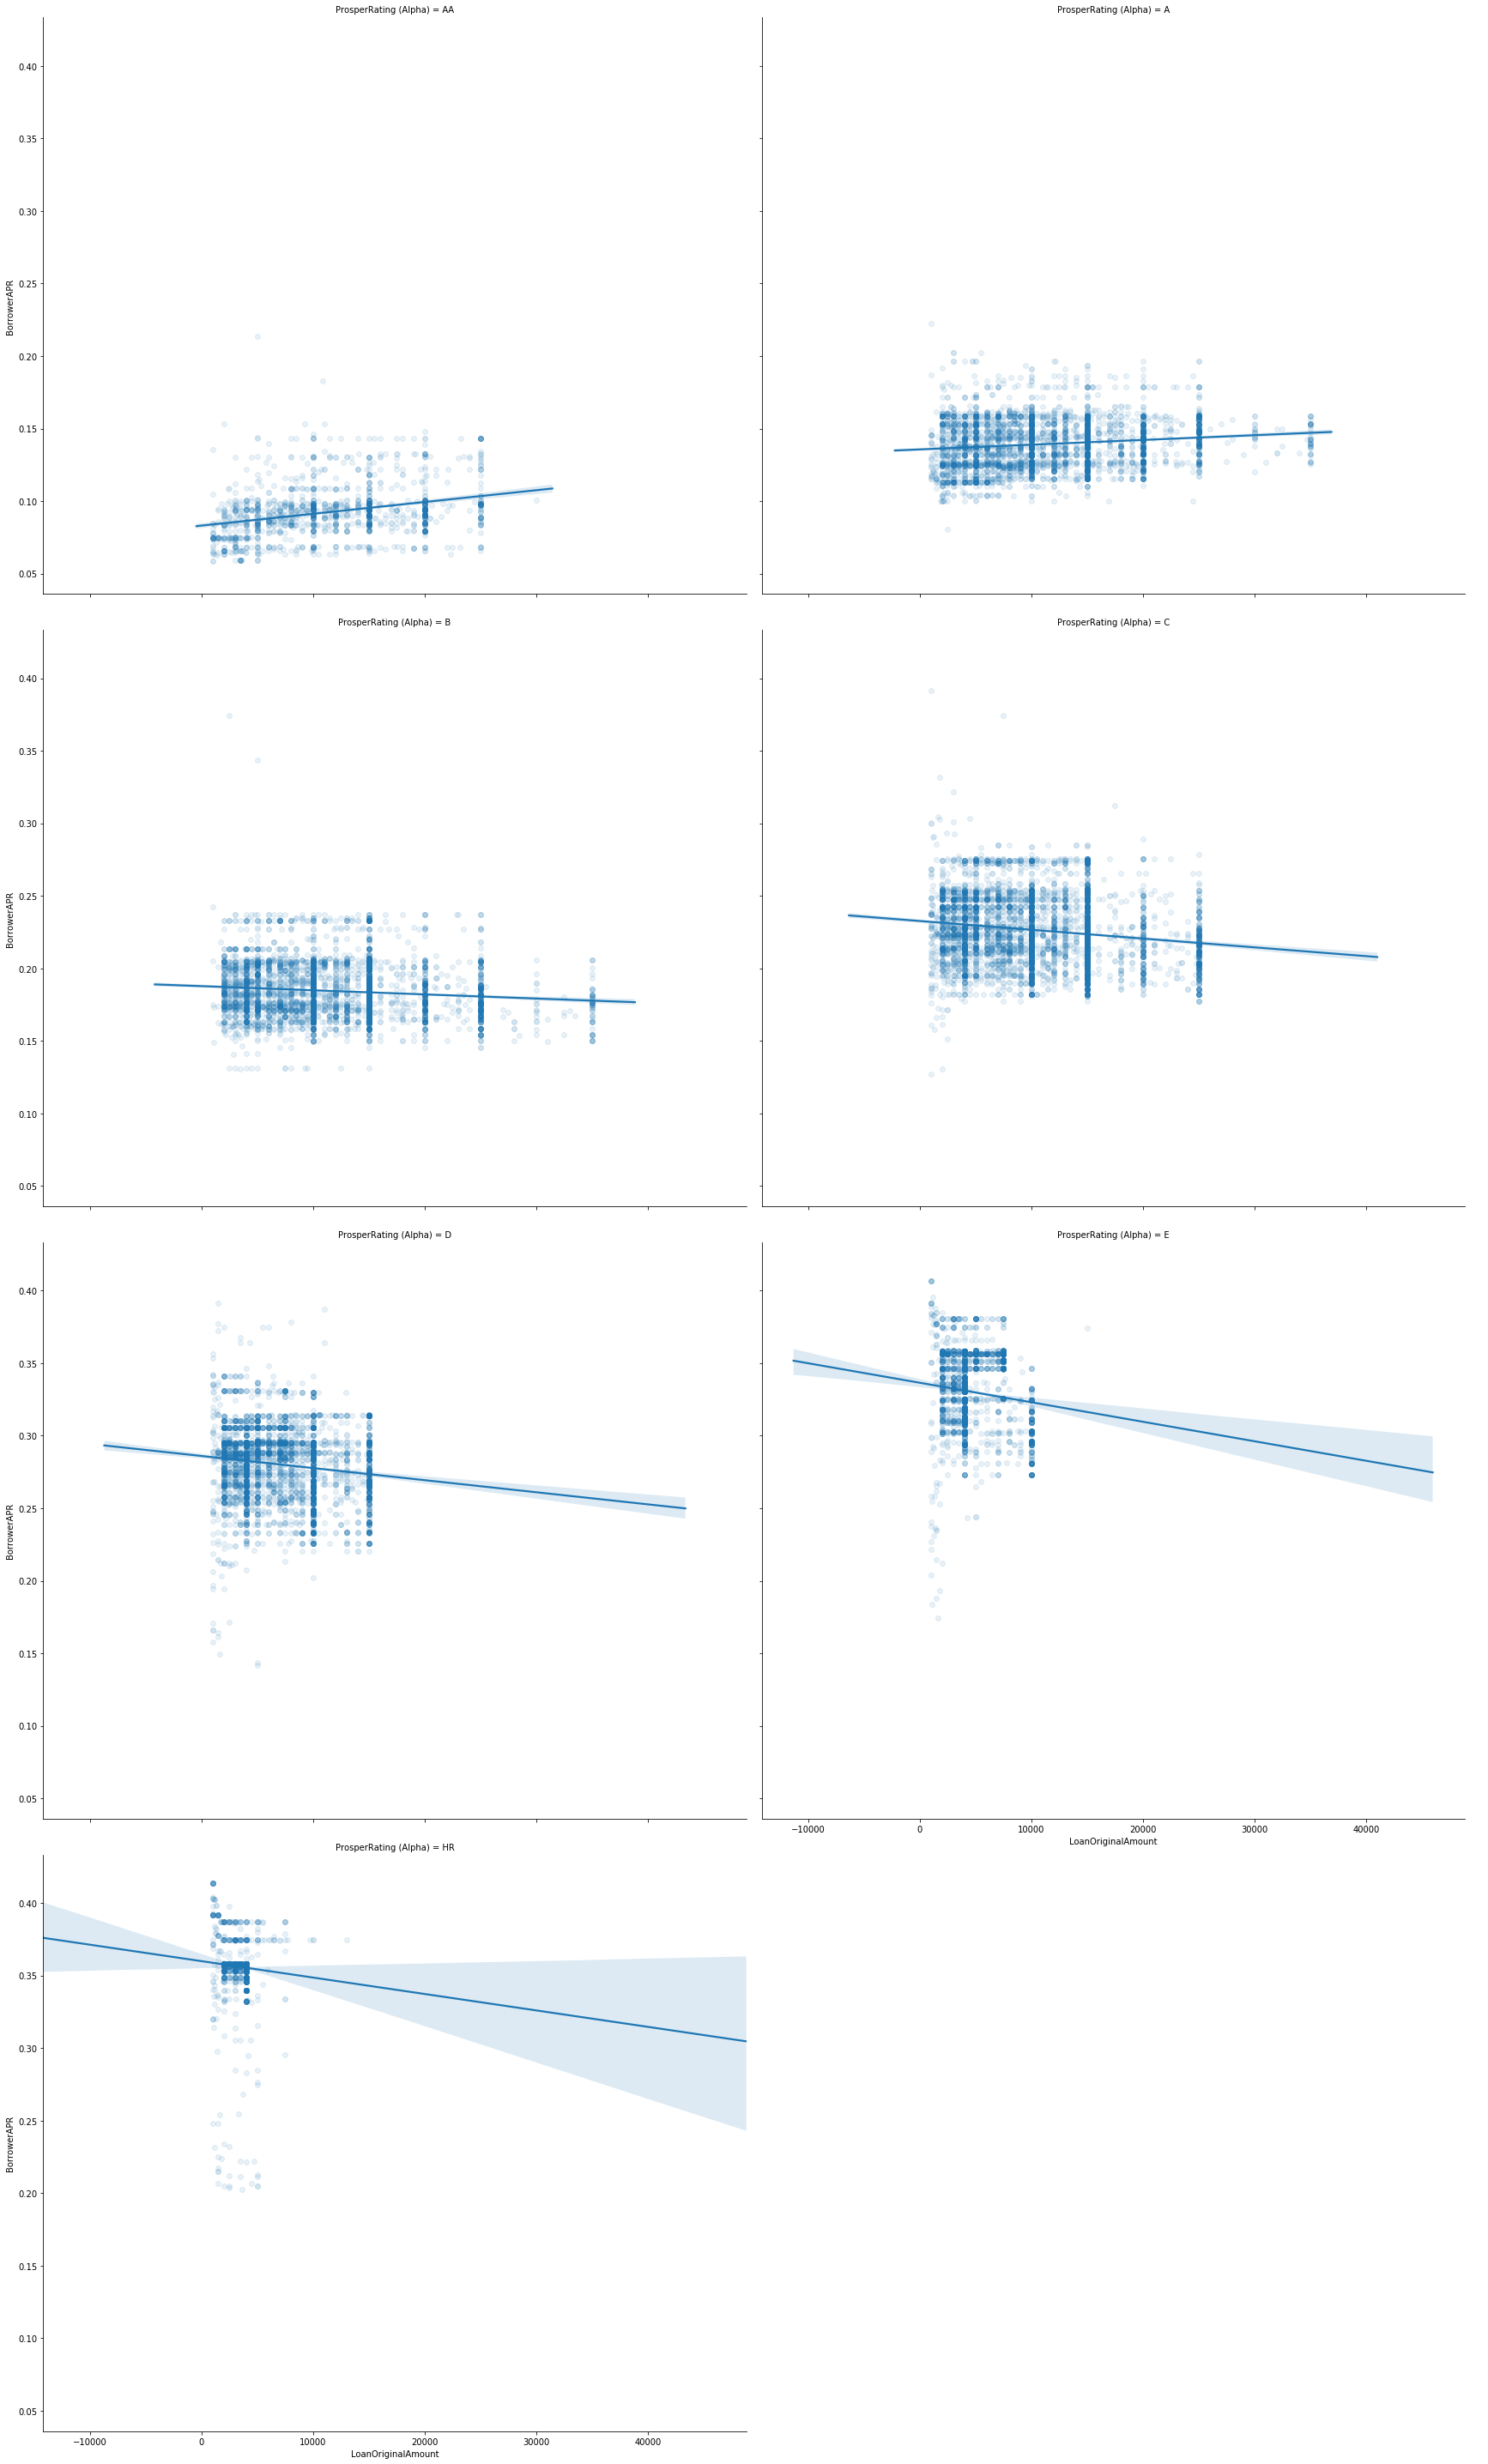

In [64]:
# Prosper rating effect on relationship of APR and loan amount
plt.figure(figsize=[ 11.69, 8.27])
g=sb.FacetGrid(data=loans, aspect=1.2, height=10, col='ProsperRating (Alpha)', col_wrap=2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

#### The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

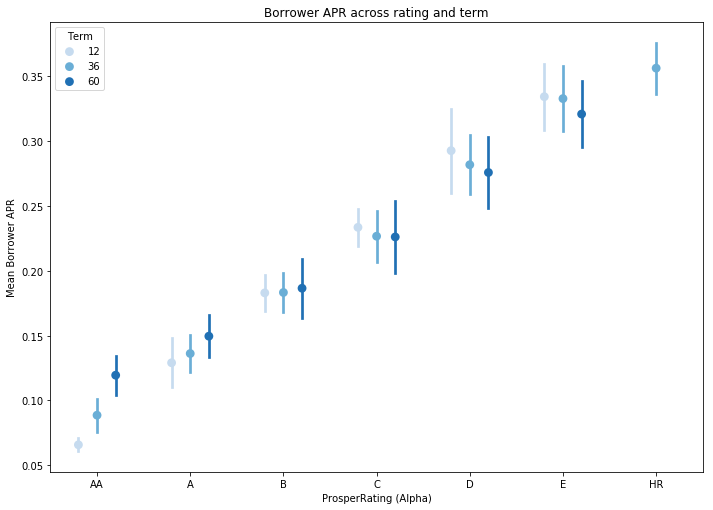

In [65]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

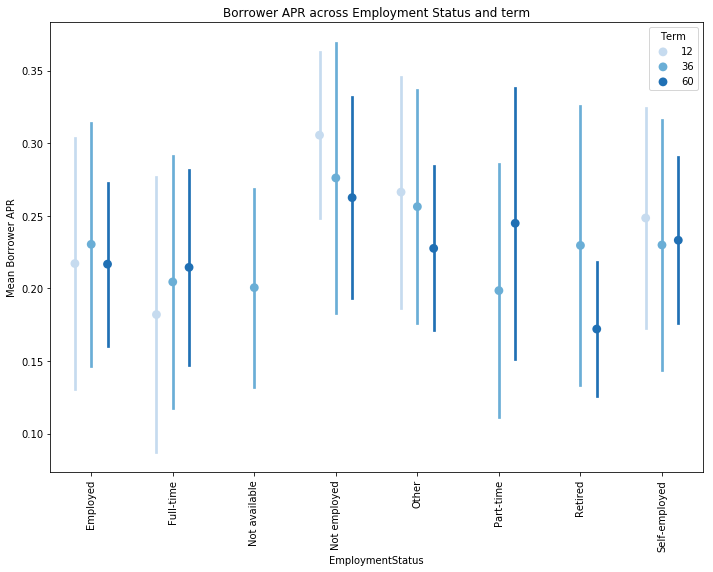

In [66]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = loans, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Employment Status and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

#### Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

#### Then, look at the rating and term effects on stated monthly income and loan original amount variables



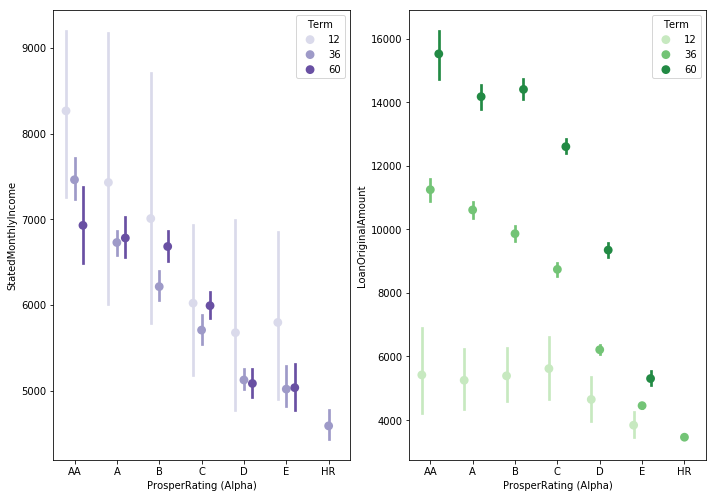

In [67]:
fig, ax = plt.subplots(ncols=2, figsize=[ 11.69, 8.27])
sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', 
             hue = 'Term',palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', 
             hue = 'Term',palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

#### For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

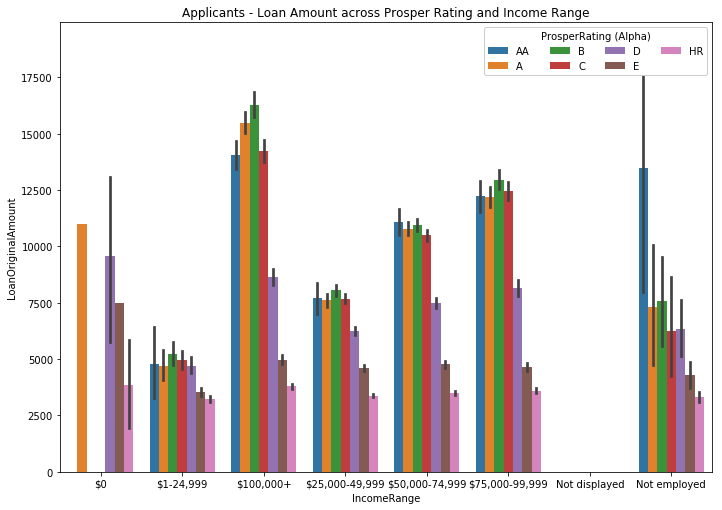

In [68]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.barplot(data = loans, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 1, ncol =4, framealpha = 1, title = 'ProsperRating (Alpha)')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

### Does rating depend on the monhtly income and Employment status?

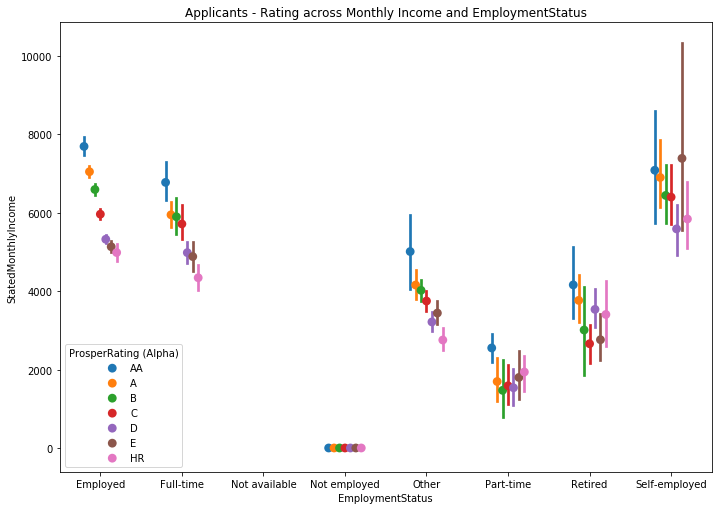

In [85]:
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.pointplot(data = loans, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating (Alpha)',
                  dodge = 0.4, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

### Insights from the multivariate exploration data
#### For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

#### Employed and full time employees have their mean salaries in higher range

#### Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

#### The monthly income of borrowers are having higher values for employed, other and full time employment status 

#### with the prosper rating of AA, A and B

#### We can also clearly observe that HR prosper rating applicants have higher interest rates

#### To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange,  and employment status.